In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as pl

{('A', 'B'): Text(0.5173210946563862, 0.7066782774481759, '5.0'),
 ('A', 'C'): Text(0.6017682923318535, 0.6300463055850298, '5.0'),
 ('B', 'C'): Text(0.46101761364995997, 0.5622336299828781, '6.0'),
 ('B', 'D'): Text(0.284365053356034, 0.44468584742659223, '3.0'),
 ('C', 'D'): Text(0.3688143673471276, 0.36805361572432926, '3.0'),
 ('D', 'E'): Text(-0.079430394143306, -0.08366823956550862, '1.0'),
 ('E', 'F'): Text(-0.44792683385523524, -0.7089199419672302, '1.0'),
 ('E', 'G'): Text(-0.6137216808799049, -0.5747305790422889, '1.0'),
 ('F', 'G'): Text(-0.7106175093506661, -0.8658084974181959, '1.0')}

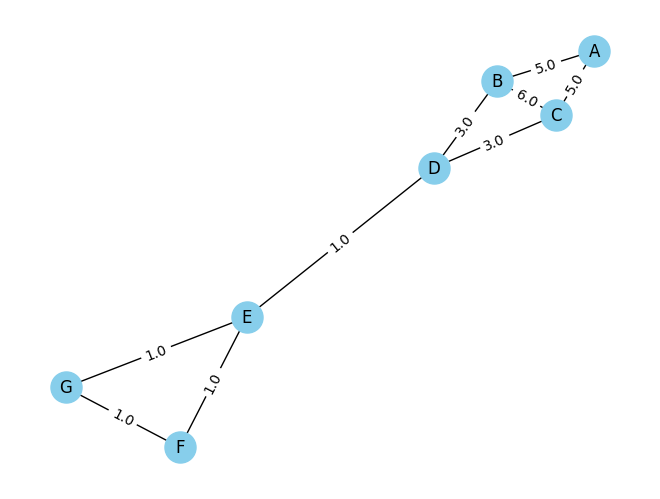

In [2]:

A = np.array([[0, 5, 5, 0, 0, 0, 0],
              [5, 0, 6, 3, 0, 0, 0],
              [5, 6, 0, 3, 0, 0, 0],
              [0, 3, 3, 0, 1, 0, 0],
              [0, 0, 0, 1, 0, 1, 1],
              [0, 0, 0, 0, 1, 0, 1],
              [0, 0, 0, 0, 1, 1, 0]], dtype=np.float64)

G = nx.from_numpy_array(A)
G = nx.relabel_nodes(G, {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"})
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [3]:
def random_walk(graph, start_node, max_steps, frequencies):
    walk = [start_node]
    for i in range(max_steps):
        candidates = list(graph.neighbors(walk[-1]))
        weights = np.array(list(dict(G.degree(candidates, weight="weight")).values()))
        probabilities = weights/weights.sum()
        next = str(np.random.choice(candidates, p=probabilities))
        walk.append(next)
        frequencies[next] += 1
    return walk
    
frequencies = {node: 0 for node in list(G.nodes())}
walk = random_walk(G, "A", 10, frequencies)
walk

['A', 'B', 'C', 'B', 'C', 'B', 'A', 'B', 'A', 'B', 'A']

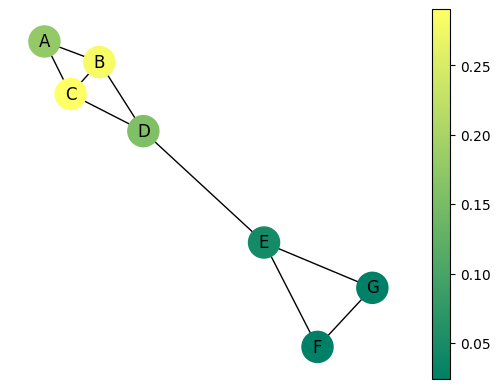

In [4]:
def colorize_clusters(graph, nbr_walks, max_steps):
    frequencies = {node: 0 for node in list(graph.nodes())}
    for _ in range(nbr_walks):
        start_node = str(np.random.choice(graph.nodes()))
        random_walk(graph, start_node, max_steps, frequencies)
    frequencies = np.array(list(frequencies.values()), dtype=np.float64)
    frequencies /= frequencies.sum()
    pos = nx.spring_layout(G)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color=frequencies, cmap=pl.cm.summer)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)
    pl.colorbar(nodes)
    pl.axis("off")

colorize_clusters(G, 100, 30)
pl.savefig("./images/random_walking.pdf", bbox_inches="tight")